In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Abre o arquivo
pkl_file = open('fingerprint_data.pkl', 'rb')
x_train, x_test, y_train, y_test = pickle.load(pkl_file)

# Reshape para o formato correto
x_train = x_train.reshape(x_train.shape[0], 372, 312, 1)
x_test = x_test.reshape(x_test.shape[0], 372, 312, 1)
input_shape = (372, 312, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normaliza
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Tamanho do conjunto de treinamento', x_train.shape[0])
print('Tamanho do conjunto de teste', x_test.shape[0])

x_train shape: (30, 372, 312, 1)
Tamanho do conjunto de treinamento 30
Tamanho do conjunto de teste 30


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(10,10), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(7,7)))
model.add(Conv2D(64, kernel_size=(4,4), input_shape=(int(input_shape[0]/2), int(input_shape[1]/2),1)))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(6,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 363, 303, 32)      3232      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 51, 43, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 40, 64)        32832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1966336   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [18]:
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
30/30 [==============================] - 3s 115ms/step - loss: 1.8023 - accuracy: 0.1000
Epoch 2/20
30/30 [==============================] - 3s 92ms/step - loss: 1.8805 - accuracy: 0.2667
Epoch 3/20
30/30 [==============================] - 3s 99ms/step - loss: 1.8841 - accuracy: 0.2333
Epoch 4/20
30/30 [==============================] - 3s 91ms/step - loss: 1.7156 - accuracy: 0.2667
Epoch 5/20
30/30 [==============================] - 3s 92ms/step - loss: 1.6556 - accuracy: 0.2667
Epoch 6/20
30/30 [==============================] - 3s 87ms/step - loss: 1.4836 - accuracy: 0.2667
Epoch 7/20
30/30 [==============================] - 3s 85ms/step - loss: 1.4934 - accuracy: 0.3333
Epoch 8/20
30/30 [==============================] - 3s 93ms/step - loss: 1.3284 - accuracy: 0.4333
Epoch 9/20
30/30 [==============================] - 3s 84ms/step - loss: 1.4306 - accuracy: 0.4667
Epoch 10/20
30/30 [==============================] - 3s 83ms/step - loss: 1.3484 - accuracy: 0.4333
Epoch 11

In [19]:
# Avaliação do modelo
acc = model.evaluate(x_test, y_test)
print('Acurácia = ', acc[1]*100, '%')

30/30 [==============================] - 1s 38ms/step
Acurácia =  96.66666388511658 %


Indivíduo: 3


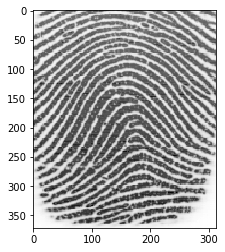

In [20]:
# Avaliação individual

image_index = 7
plt.imshow(x_test[image_index].reshape(372, 312),cmap='gray')
pred = model.predict(x_test[image_index].reshape(1, 372, 312, 1))
print('Indivíduo:', pred.argmax())